### Load Libraries

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

### Retrieve dataset

In [63]:
nyc = pd.read_csv('AB_NYC_2019.csv')
nyc2 = nyc.dropna()
nyc2.shape

(38821, 16)

In [64]:
nyc.shape

(48895, 16)

### Cleaning Steps

In [3]:
# Remove listings with a minimum stay exceeding 31 nights.
# Remove listings where the price is listed at $0.
# Transform skewed variables (log).

In [65]:
nyc2 = nyc2[nyc2.price != 0]
nyc2.shape

(38811, 16)

In [66]:
nyc2 = nyc2[nyc2.price != 0]
nyc2 = nyc2[nyc2.minimum_nights <= 31]
nyc2.shape

(38511, 16)

In [5]:
# Copy dataframe for log transformation
nyc_copy = nyc2
nyc_copy.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.851100e+04,3.851100e+04,38511.000000,38511.000000,38511.000000,38511.000000,38511.000000,38511.000000,38511.000000,38511.000000
mean,1.814818e+07,6.449503e+07,40.728085,-73.951062,141.827114,4.961543,29.370050,1.380382,5.181844,114.600556
std,1.068817e+07,7.599833e+07,0.055024,0.046755,183.603678,7.445964,48.255816,1.683806,26.403432,129.449366
min,2.539000e+03,2.571000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.781390e+06,7.098384e+06,40.688625,-73.982400,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.892996e+07,2.868076e+07,40.721630,-73.954770,101.000000,2.000000,9.000000,0.730000,1.000000,55.000000
75%,2.761105e+07,1.023837e+08,40.763000,-73.934955,170.000000,4.000000,33.000000,2.030000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,31.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
# Log transform some variables 
# minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365
# Add a very small value to make sure that there are no zeroes
nyc_copy.minimum_nights += 0.000000001
nyc_copy['minimum_nights'] = np.log10(nyc_copy['minimum_nights'])

nyc_copy.number_of_reviews += 0.000000001
nyc_copy['number_of_reviews'] = np.log10(nyc_copy['number_of_reviews'])

nyc_copy.reviews_per_month += 0.000000001
nyc_copy['reviews_per_month'] = np.log10(nyc_copy['reviews_per_month'])

nyc_copy.calculated_host_listings_count += 0.000000001
nyc_copy['calculated_host_listings_count'] = np.log10(nyc_copy['calculated_host_listings_count'])

nyc_copy.availability_365 += 0.000000001
nyc_copy['availability_365'] = np.log10(nyc_copy['availability_365'])

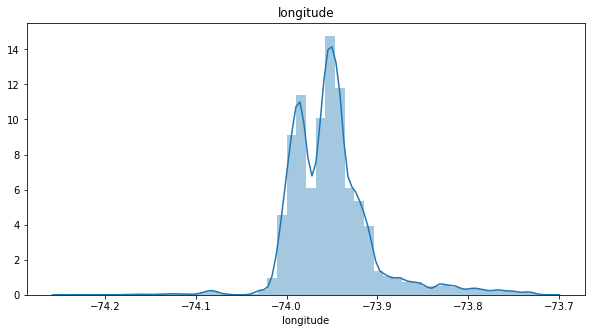

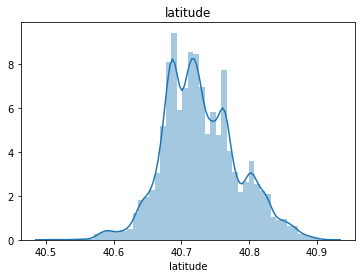

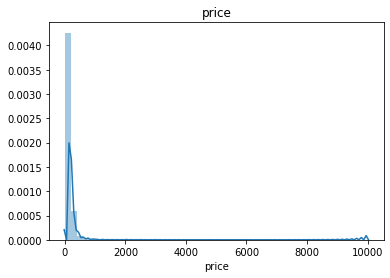

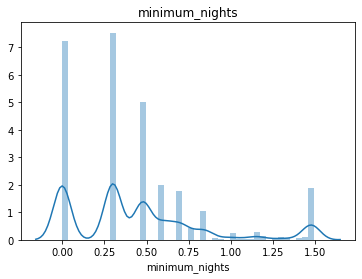

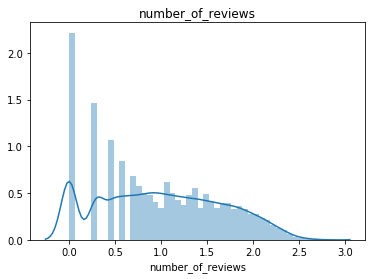

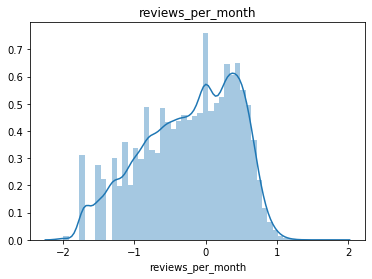

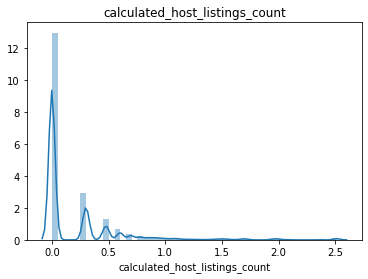

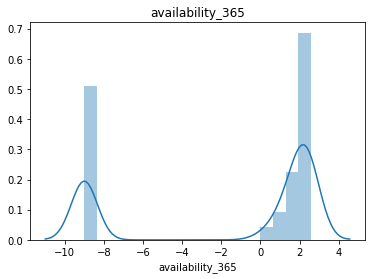

In [7]:
# Histogram for numeric columns (to look at distributions of transformed variables)
df = nyc_copy._get_numeric_data() # drop non-numeric columns
num_vars = df.drop(columns = ['id', 'host_id']) # drop id and host_id
plt.figure(figsize=(10,5))

for i, col in enumerate(num_vars.columns):
    plt.figure(i)
    plt.title(col)
    sns.distplot(num_vars[col])

In [62]:
nyc_copy.shape

(38511, 16)